<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  920 non-null    float64
 1   a       1193 non-null   object 
 2   b       1196 non-null   float64
 3   c       1196 non-null   int64  
 4   d       561 non-null    object 
 5   e       1196 non-null   object 
 6   f       1196 non-null   float64
 7   g       1196 non-null   object 
 8   h       1158 non-null   float64
 9   i       1087 non-null   object 
 10  j       591 non-null    float64
 11  k       1196 non-null   float64
 12  l       1196 non-null   float64
 13  m       778 non-null    object 
 14  n       1012 non-null   float64
 15  o       1008 non-null   float64
 16  p       1122 non-null   float64
 17  q       1009 non-null   float64
 18  r       1196 non-null   float64
 19  s       1196 non-null   object 
 20  t       1110 non-null   float64
 21  u       1079 non-null   float64
 22  

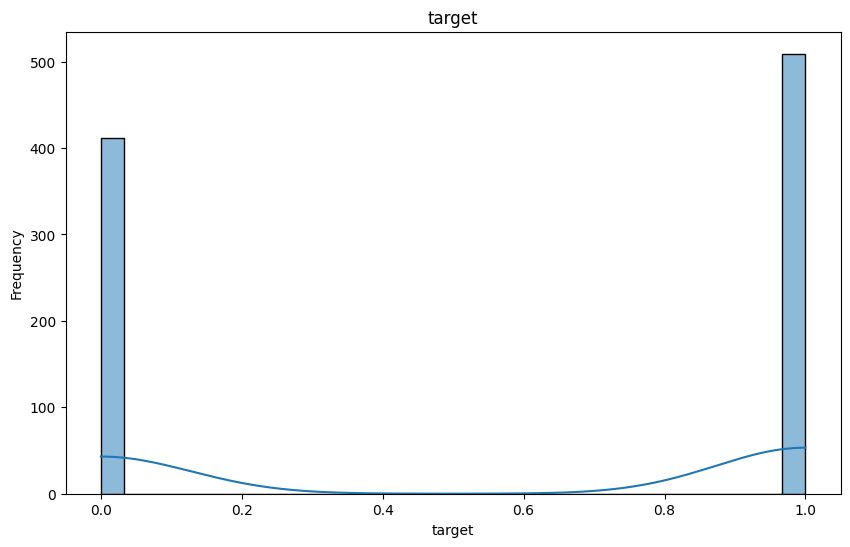

/home/user/BINF5507--Assignment_1/data_preprocessor.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data[col].fillna(clean_data[col].mean(), inplace = True)


        target                 a         b   c                  d          e  \
0     0.000000    lv hypertrophy  0.531368  63       fixed defect  Cleveland   
1     1.000000    lv hypertrophy -1.056253  67             normal  Cleveland   
2     1.000000    lv hypertrophy  0.438407  67  reversable defect  Cleveland   
3     0.000000            normal -1.413430  37             normal  Cleveland   
4     0.000000    lv hypertrophy -1.347216  41             normal  Cleveland   
...        ...               ...       ...  ..                ...        ...   
1191  0.553261  st-t abnormality  1.370062  54                NaN    Hungary   
1192  0.553261            normal -0.937386  51                NaN    Hungary   
1193  0.553261    lv hypertrophy -0.319276  51             normal  Cleveland   
1194  0.553261            normal  1.892264  62                NaN    Hungary   
1195  0.553261            normal  0.257711  46                NaN    Hungary   

             f                g      h 

In [1]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 1. Load the dataset
messy_data = pd.read_csv('messy_data.csv')
clean_data = messy_data.copy()


#checking data types and basic statistics
clean_data.head()
clean_data.info()
clean_data.describe()

#identifying issues
#missing values
clean_data.isnull().sum()

#redundant columns
clean_data.T[clean_data.T.duplicated()].index.tolist()

#data visualization
#Histogram of target
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['target'], bins=30, kde=True)
plt.title('target')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.show()


# 2. Preprocess the data
clean_data = dp.impute_missing_values(clean_data)
print(clean_data)

clean_data = dp.remove_duplicates(clean_data)
print(clean_data)

clean_data = dp.normalize_data(clean_data)
print(clean_data)

clean_data = dp.remove_redundant_features(clean_data)
print(clean_data)

# 3. Save the cleaned dataset
clean_data.to_csv('clean_data.csv', index=False)
clean_data.info()
clean_data.describe()

# 4. Train and evaluate the model
dp.simple_model(clean_data)